In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cnt
from scipy.optimize import curve_fit

In [3]:
data = np.loadtxt('data/Kennlinie_Anode_GND/71_6.txt', skiprows=3)
offset = 300
U = data[offset:,0]
I = data[offset:, 1] * 1e6

In [4]:
window_size = 40
smoothed_I = np.convolve(I, np.ones(window_size)/window_size, mode='same')
i_floating_pot = abs(smoothed_I).argmin()

floating_region_start = i_floating_pot - 60
floating_region_end = i_floating_pot + 60

floating_voltage = U[floating_region_start:floating_region_end]
floating_current = I[floating_region_start:floating_region_end]

slope, intercept = np.polyfit(floating_voltage, floating_current, 1)
floating_potential = - intercept / slope
Ion_sat_current = I[0 : i_floating_pot - 200].mean()

In [6]:
print(floating_potential)

-6.490998492182563


6.494745382440052


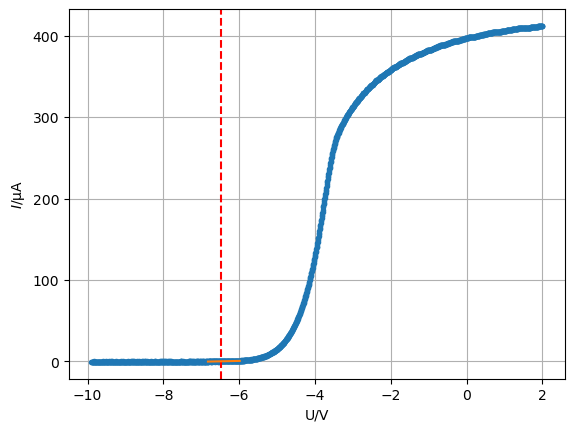

In [7]:
fig, ax = plt.subplots()
ax.plot(U, I, marker='.')
ax.axvline(x=floating_potential, color='r', linestyle='--', label='Plasma Potential')
#ax.axhline(y=Ion_sat_current, color='b', linestyle='--', label='Ion SaturationCurrent')
ax.grid()
ax.set(xlabel="U/V", ylabel="$I / \\mathrm{\\mu A}$")
#ax.set(xlim=[-10, -5.5],  ylim=[-1.0, 1])

xs = np.linspace(U[floating_region_start], U[floating_region_end], 100)

print(intercept)
ax.plot(xs, intercept + slope * xs)